In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
register_matplotlib_converters()
from time import time

In [2]:
import os
import pyarrow as pa
import pyarrow.parquet as pq

In [3]:
# specify the directory containing the CSV files
directory = "C://Users//20212828//Downloads//Bigfile"

# initialize an empty list to store dataframes
df_list = []

# iterate through all subfolders and CSV files in the directory
for root, dirs, files in os.walk(directory):
    for filename in files:
        # print(filename)
        #Change csv names
        if filename.endswith("metropolitan-street.csv"): 
            # print(filename)
            # read the CSV file into a dataframe and append to the list
            filepath = os.path.join(root, filename)
            df = pd.read_csv(filepath)
            df_list.append(df)

# concatenate all dataframes into a single dataframe
concatenated_df = pd.concat(df_list, axis=0, ignore_index=True)
# write the concatenated dataframe to a new parquet file
output_filepath = "C://Users//20212828//Downloads//Bigfile//Metropolitan-street.parquet"

# write the concatenated dataframe to a Parquet file
table = pa.Table.from_pandas(concatenated_df)
pq.write_table(table, output_filepath)

In [4]:
pip install fsspec

Note: you may need to restart the kernel to use updated packages.


In [5]:
# Read the Parquet file into a pandas DataFrame
df = pd.read_parquet("C://Users//20212828//Downloads//Bigfile//Metropolitan-street.parquet")

# Do something with the DataFrame
df.head()

,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
0,None,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.145949,51.593914,On or near Providence Place,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,NaN
1,None,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.140192,51.582311,On or near Hatch Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,NaN
2,None,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,NaN
3,None,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,NaN
4,None,2010-12,Metropolitan Police Service,Metropolitan Police Service,0.134947,51.588063,On or near Mead Grove,E01000027,Barking and Dagenham 001A,Anti-social behaviour,None,NaN


In [6]:
# Filter the DataFrame to only include rows where the LSOA name is 'Barnet' and the Crime type is 'Burglary'
filtered_df = df[(df['LSOA name'].str.contains('Barnet')) & (df['Crime type'].str.contains('Burglary'))]

# Do something with the filtered DataFrame
filtered_df.head()


,Crime ID,Month,Reported by,Falls within,Longitude,Latitude,Location,LSOA code,LSOA name,Crime type,Last outcome category,Context
2051,None,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.201877,51.655538,On or near High Street,E01000248,Barnet 001A,Burglary,None,NaN
2052,None,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.207853,51.654317,On or near The Avenue,E01000248,Barnet 001A,Burglary,None,NaN
2053,None,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.202510,51.656348,On or near Bruce Road,E01000248,Barnet 001A,Burglary,None,NaN
2054,None,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.206779,51.654768,On or near The Drive,E01000248,Barnet 001A,Burglary,None,NaN
2071,None,2010-12,Metropolitan Police Service,Metropolitan Police Service,-0.209537,51.655223,On or near Marriott Road,E01000249,Barnet 001B,Burglary,None,NaN


In [7]:
# Convert Month column to datetime format
filtered_df['Month'] = pd.to_datetime(filtered_df['Month'], format='%Y-%m')

# Add a dummy day variable
filtered_df['Month'] = filtered_df['Month'].dt.strftime('%Y-%m-%d')


C:\Users\20212828\AppData\Local\Temp\ipykernel_1324\1256297692.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = pd.to_datetime(filtered_df['Month'], format='%Y-%m')
C:\Users\20212828\AppData\Local\Temp\ipykernel_1324\1256297692.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Month'] = filtered_df['Month'].dt.strftime('%Y-%m-%d')


In [8]:
filtered_dfdate = filtered_df.groupby(['Month'])['Month'].count().reset_index(name="count")
filtered_dfdate['Month'] = pd.to_datetime(filtered_dfdate['Month'])
filtered_dfdate = filtered_dfdate.set_index('Month')
print(filtered_dfdate)

            count
Month            
2010-12-01    372
2011-01-01    486
2011-02-01    403
2011-03-01    408
2011-04-01    414
...           ...
2022-11-01    246
2022-12-01    228
2023-01-01    242
2023-02-01    199
2023-03-01    231

[148 rows x 1 columns]


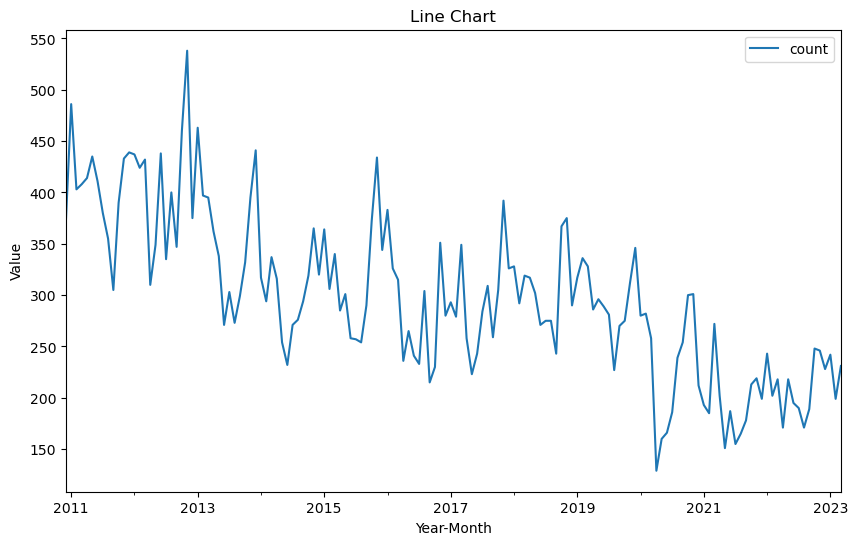

In [9]:
import plotly.express as px

# Plot a line chart
filtered_dfdate.plot(kind='line', y='count', figsize=(10, 6))

# Add labels and title
plt.xlabel('Year-Month')
plt.ylabel('Value')
plt.title('Line Chart')

# Display the plot
plt.show()

In [10]:
first_diff = filtered_dfdate.diff()[1:]

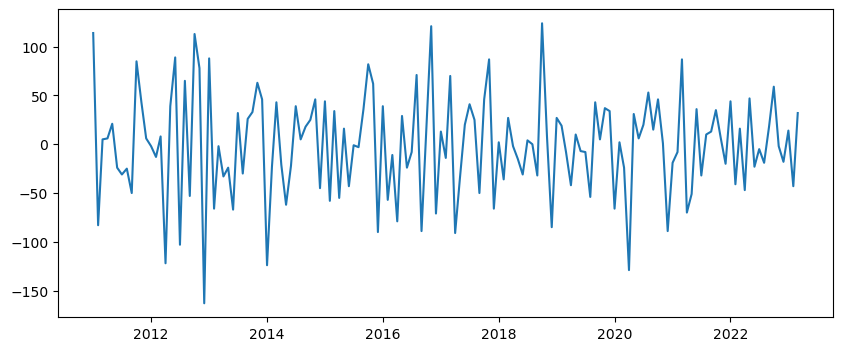

In [11]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<BarContainer object of 20 artists>

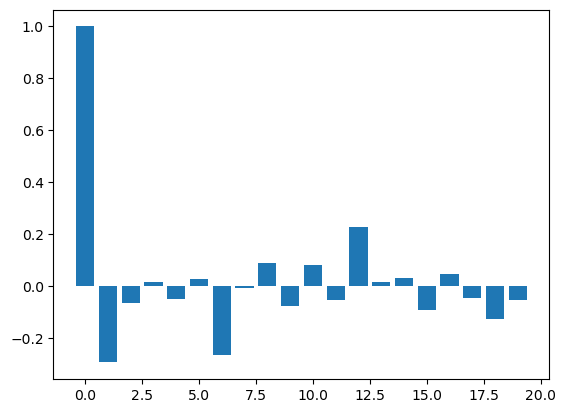

In [91]:
acf_vals = acf(first_diff)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:1024: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs // 2 - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(


<BarContainer object of 20 artists>

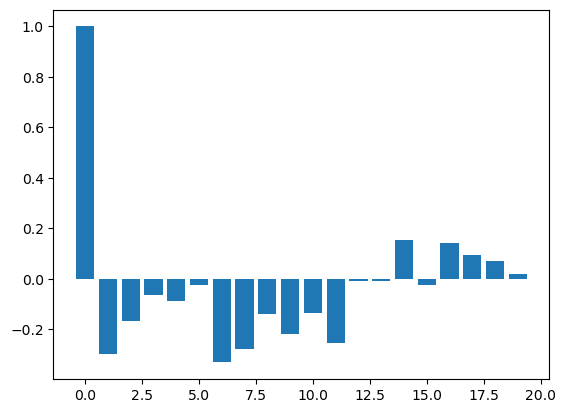

In [90]:
pacf_vals = pacf(first_diff)
num_lags = 20
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [169]:
train_end = datetime(2020,3,1)
test_end = datetime(2024,1,1)

train_data = filtered_dfdate[:train_end]
test_data = filtered_dfdate[train_end + timedelta(days=1):test_end]
test_data = test_data.squeeze()

In [170]:
my_order = (0,1,0)
my_seasonal_order = (1, 0, 1, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


In [171]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

Model Fitting Time: 0.2780613899230957


In [172]:

#summary of the model
print(model_fit.summary())

                                      SARIMAX Results                                       
Dep. Variable:                                count   No. Observations:                  112
Model:             SARIMAX(0, 1, 0)x(1, 0, [1], 12)   Log Likelihood                -591.562
Date:                              Wed, 31 May 2023   AIC                           1189.124
Time:                                      14:30:57   BIC                           1197.253
Sample:                                  12-01-2010   HQIC                          1192.422
                                       - 03-01-2020                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.9995      0.083     12.031      0.000       0.837       1.162
ma.S.L12      -0.98

In [173]:
#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data - predictions

Text(0, 0.5, 'Error')

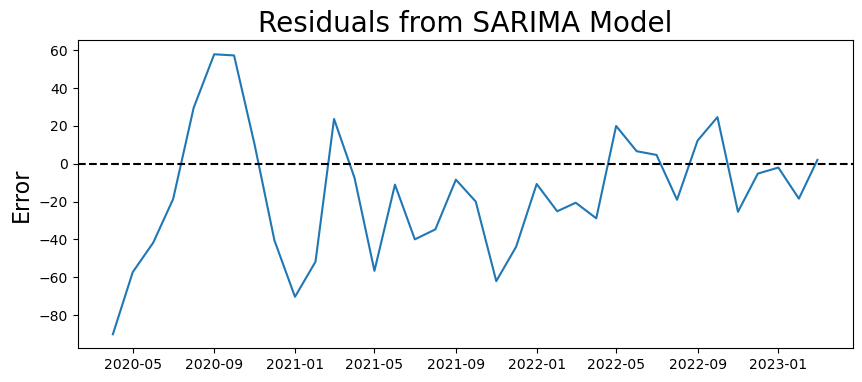

In [174]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Burglaries')

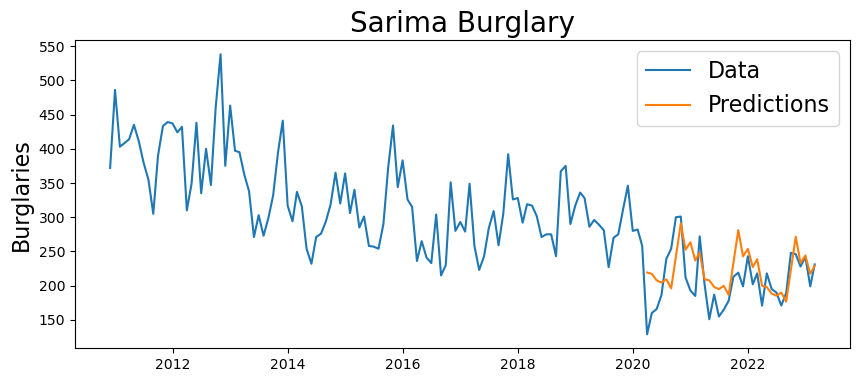

In [175]:
plt.figure(figsize=(10,4))

plt.plot(filtered_dfdate)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Sarima Burglary', fontsize=20)
plt.ylabel('Burglaries', fontsize=16)

In [192]:
start = datetime(2021,7,1)
end = datetime(2023,4,1)

result = residuals[start : end]

In [186]:
print('Mean Absolute Percent Error:', round(np.mean(abs(residuals/test_data)),4))

Mean Absolute Percent Error: 0.1553


In [187]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 36.53392265113902


In [193]:
print('Absolute Mean Squared Error:', np.mean(np.abs(residuals)))

Absolute Mean Squared Error: 20.71052494648706


In [158]:
##Rolling Forecast Origin##

In [159]:
rolling_predictions = test_data.copy()
for train_end in test_data.index:
    train_data = filtered_dfdate[:train_end-timedelta(days=1)]
    model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
    model_fit = model.fit()

    pred = model_fit.forecast()
    rolling_predictions[train_end] = pred

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency informa

In [160]:
rolling_residuals = test_data - rolling_predictions

Text(0, 0.5, 'Error')

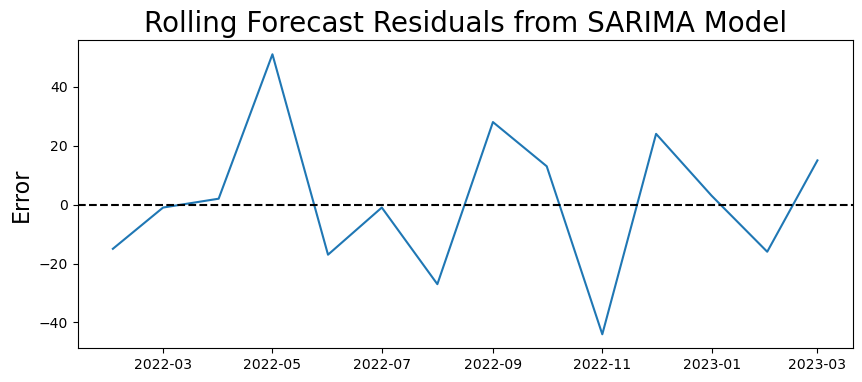

In [161]:
plt.figure(figsize=(10,4))
plt.plot(rolling_residuals)
plt.axhline(0, linestyle='--', color='k')
plt.title('Rolling Forecast Residuals from SARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)

Text(0, 0.5, 'Production')

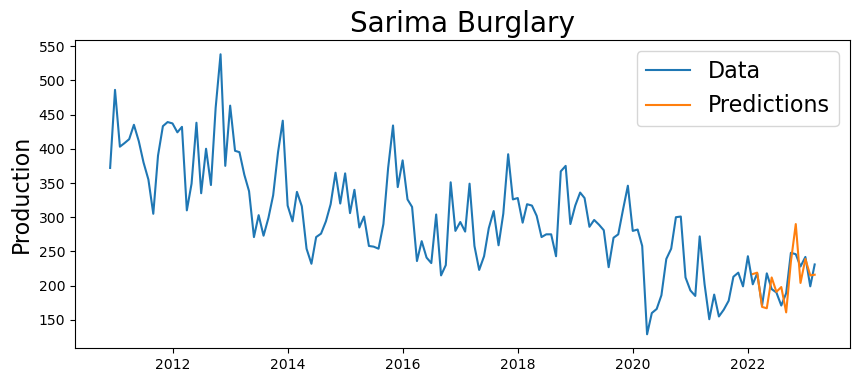

In [162]:
plt.figure(figsize=(10,4))

plt.plot(filtered_dfdate)
plt.plot(rolling_predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('Sarima Burglary', fontsize=20)
plt.ylabel('Production', fontsize=16)

In [163]:
print('Mean Absolute Percent Error:', round(np.mean(abs(rolling_residuals/test_data)),4))

Mean Absolute Percent Error: 0.0869


In [164]:
print('Root Mean Squared Error:', np.sqrt(np.mean(rolling_residuals**2)))

Root Mean Squared Error: 23.61143790623519


In [168]:
print('Absolute Mean Squared Error:', np.mean(np.abs(rolling_residuals)))

Absolute Mean Squared Error: 18.357142857142858
